In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [60]:
calendar_summary = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/calendar_summary.csv')
#Detailed Calendar Data for listings in Berlin.

listings = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/listings.csv') 
#Summary information and metrics for listings in Berlin.

listings_summary = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/listings_summary.csv')
#Detailed Listings Data for Berlin.

neighbourhoods = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/neighbourhoods.csv')
#Neighbourhood list for geo filter.

reviews = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/reviews.csv')
#Summary Review Data and Listing ID.

reviews_summary = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/reviews_summary.csv')
#Detailed Review Data for listings in Berlin.

In [61]:
###############################################################################################################################

In [62]:
listings_summary.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25


In [63]:
listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220


In [64]:
listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [65]:
listings.neighbourhood_group.unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

In [66]:
listings.neighbourhood.unique()

array(['Brunnenstr. Süd', 'Prenzlauer Berg Nordwest',
       'Prenzlauer Berg Südwest', 'Schöneberg-Nord', 'Helmholtzplatz',
       'Frankfurter Allee Süd FK', 'nördliche Luisenstadt',
       'Reuterstraße', 'südliche Luisenstadt', 'Tempelhofer Vorstadt',
       'Prenzlauer Berg Süd', 'Moabit Ost', 'Prenzlauer Berg Nord',
       'Otto-Suhr-Allee', 'Schillerpromenade', 'Alt  Treptow',
       'Alexanderplatz', 'Neue Kantstraße', 'Ostpreußendamm',
       'Schmöckwitz/Karolinenhof/Rauchfangswerder',
       'Neuköllner Mitte/Zentrum', 'Frankfurter Allee Nord', 'Kantstraße',
       'Schmargendorf', 'Regierungsviertel', 'Schöneberg-Süd',
       'Blankenfelde/Niederschönhausen', 'Friedrichshagen',
       'Südliche Friedrichstadt', 'Moabit West', 'Wiesbadener Straße',
       'West 3', 'Blankenburg/Heinersdorf/Märchenland',
       'Rummelsburger Bucht', 'Friedenau', 'Brunnenstr. Nord', 'Ost 2',
       'Volkspark Wilmersdorf', 'Pankow Zentrum', 'Pankow Süd',
       'Osloer Straße', 'Drakestr.', '

In [67]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [68]:
listings['room_type'] = le.fit_transform(listings['room_type'])
listings['neighbourhood_group'] = le.fit_transform(listings['neighbourhood_group'])
listings['neighbourhood'] = le.fit_transform(listings['neighbourhood'])

In [69]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,4,18,52.534537,13.402557,0,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,6,95,52.548513,13.404553,1,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,6,98,52.534996,13.417579,0,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,10,110,52.498855,13.349065,1,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,6,49,52.543157,13.415091,1,42,2,197,2018-11-04,1.75,1,26
5,9991,Geourgeous flat - outstanding views,33852,Philipp,6,98,52.533031,13.416047,0,180,6,6,2018-07-23,0.15,1,137
6,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,6,95,52.547846,13.405562,0,70,90,23,2018-11-01,0.23,3,129
7,16401,APARTMENT TO RENT,59666,Melanie,1,32,52.510514,13.457850,1,120,30,0,NaN,NaN,1,365
8,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,1,134,52.504792,13.435102,0,90,60,48,2017-12-14,0.47,2,159
9,17409,Downtown Above The Roofs In Berlin,67590,Wolfram,6,98,52.529071,13.412843,1,45,3,279,2018-10-31,2.83,1,42


In [70]:
listing_df=pd.concat([listings['neighbourhood_group'],listings['neighbourhood'],listings['latitude'],listings['longitude'],listings['room_type'],listings['price'],listings['minimum_nights'],listings['number_of_reviews'],listings['reviews_per_month'],listings['calculated_host_listings_count'],listings['availability_365']],axis=1)

In [71]:
listing_df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [72]:
listing_df['reviews_per_month']=listing_df['reviews_per_month'].fillna((listing_df['reviews_per_month'].mean()))

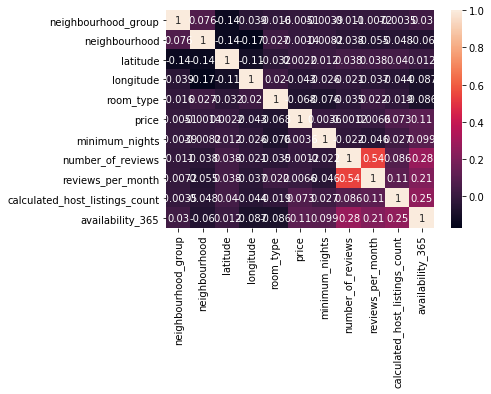

In [73]:
Var_Corr = listing_df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [74]:
y= listing_df['price']
X=listing_df.drop('price',axis=1)

In [75]:
sc=StandardScaler()
listing_df=sc.fit_transform(listing_df)
listing_df

array([[-4.74692110e-02, -1.50041059e+00,  8.01746313e-01, ...,
         1.91562237e+00,  5.67675788e-01,  5.12268309e-01],
       [ 6.31798331e-01,  4.37255385e-01,  1.25513056e+00, ...,
         2.07640085e-01, -2.50392567e-01, -6.68977371e-01],
       [ 6.31798331e-01,  5.12748864e-01,  8.16632686e-01, ...,
         8.35559014e-02, -2.50392567e-01,  1.17410099e+00],
       ...,
       [ 6.31798331e-01,  5.12748864e-01,  7.12936040e-01, ...,
        -1.45864712e-15,  2.22968849e-02, -5.43312937e-01],
       [-4.74692110e-02, -1.90304248e+00,  3.56147246e-01, ...,
        -1.45864712e-15,  2.94986337e-01, -6.18711597e-01],
       [ 2.92164560e-01,  6.88900316e-01, -1.16990546e+00, ...,
        -1.45864712e-15, -2.50392567e-01, -4.93047163e-01]])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [77]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
forest_model_score=forest_model.score(X_test,y_test)
forest_model_score

0.7926993236346264

In [19]:
###############################################################################################################################

In [20]:
calendar_summary.head(3)
#calendar_summary.listing_id.nunique()
#calendar_summary.price

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN


In [21]:
calendar_summary['Year']=[d.split('-')[0] for d in calendar_summary.date]
calendar_summary['Month']=[d.split('-')[1] for d in calendar_summary.date]
calendar_summary['Day']=[d.split('-')[2] for d in calendar_summary.date]
calendar_summary.head(3)

,listing_id,date,available,price,Year,Month,Day
0,2015,2019-09-10,f,NaN,2019,09,10
1,2015,2019-09-09,f,NaN,2019,09,09
2,2015,2019-09-08,f,NaN,2019,09,08


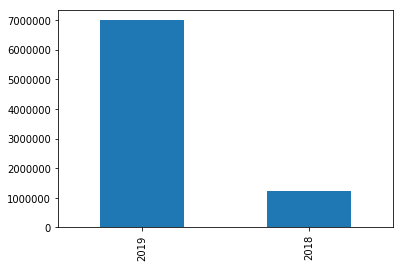

In [22]:
import matplotlib.pyplot as plt
calendar_summary.Year.value_counts().plot.bar()

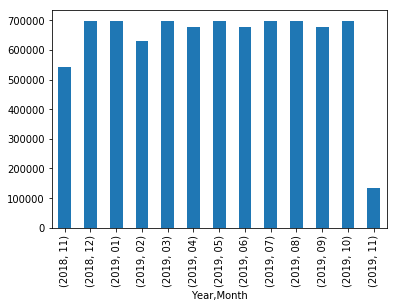

In [23]:
Yearmonth=pd.concat([calendar_summary['Year'],calendar_summary['Month']],axis=1)
Yearmonth.groupby(['Year','Month']).size().plot.bar()

In [ ]:
###############################################################################################################################